In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

# Configure matplotlib and seaborn

NEW_TABLEAU10 = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2','#59A14E',
                 '#EDC949','#B07AA2','#FF9DA7','#9C755F','#BAB0AC']

mpl.rcParams["figure.figsize"] = (3.5, 2.625)

sns.set_context("paper", rc={"font.size": 8,"axes.titlesize": 8,"axes.labelsize": 8,
                             "xtick.labelsize": 7, "ytick.labelsize": 7, "legend.fontsize": 7})

# sns.set_context("notebook")

sns.set_style("whitegrid", rc={"patch.edgecolor": "black"})
sns.set_palette(sns.color_palette(NEW_TABLEAU10))

In [3]:
def plot_breakdown(df):
    BAR_WIDTH = 0.25
    BAR_GAP = 0.20

    # set height of bar
    bars1 = df["kEDM total"]
    bars2 = df["mpEDM total"]

    # Compute positions of bars
    r1 = np.arange(len(bars1)) - BAR_GAP / 2
    r2 = r1 + BAR_WIDTH + BAR_GAP / 2

    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot bars

    rect1 = ax.bar(r1, df["kEDM partial_sort"], width=BAR_WIDTH, label="kEDM partial_sort", 
                   color="C1", linewidth=0.5)
    rect2 = ax.bar(r1, df["kEDM calc_distances"], bottom=df["kEDM partial_sort"], width=BAR_WIDTH, 
                   label="kEDM calc_distances", color="C0", linewidth=0.5)

    ax.bar(r2, df["mpEDM partial_sort"], width=BAR_WIDTH, label="mpEDM partial_sort", 
           color="C1", linewidth=0.5)
    ax.bar(r2, df["mpEDM calc_distances"], bottom=df["mpEDM partial_sort"], width=BAR_WIDTH, 
           label="mpEDM calc_distances", color="C0", linewidth=0.5)

    # Setup x and y axes
    ax.set_xlabel("E")
    ax.set_xticks(list(r1) + list(r2), minor=True)
    ax.set_xticks((r1 + r2) / 2)
    ax.set_xticklabels(["kEDM"] * len(bars1) + ["mpEDM"] * len(bars1), rotation=90, minor=True)
    ax.set_xticklabels(df["E"])
    ax.set_ylabel("Runtime [ms]")
    
    for text in ax.get_xticklabels(which="major"):
        text.set_y(-0.20)

    ax.legend([rect2, rect1], ["Parwise distances", "Partial sort"])

    return fig

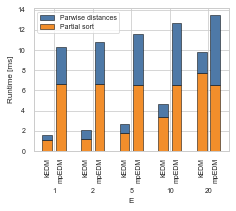

In [4]:
breakdown_v100 = pd.read_table("breakdown_knn_v100.txt")
fig = plot_breakdown(breakdown_v100[breakdown_v100["L"] == 10000])

plt.show(fig)
fig.savefig("../figs/breakdown_v100.pdf", bbox_inches="tight", pad_inches=0)

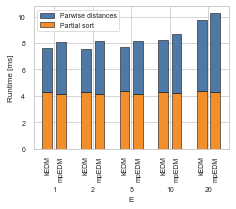

In [5]:
breakdown_epyc = pd.read_table("breakdown_knn_epyc.txt")
fig = plot_breakdown(breakdown_epyc[breakdown_epyc["L"] == 10000])

plt.show(fig)
fig.savefig("../figs/breakdown_epyc.pdf", bbox_inches="tight", pad_inches=0)

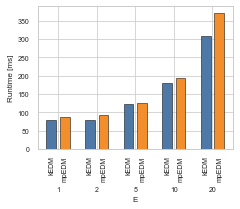

In [5]:
def plot_runtime(df):
    BAR_WIDTH = 0.25
    BAR_GAP = 0.20

    # set height of bar
    bars1 = df["kEDM lookup"]
    bars2 = df["mpEDM lookup"]

    # Compute positions of bars
    r1 = np.arange(len(bars1)) - BAR_GAP / 2
    r2 = r1 + BAR_WIDTH + BAR_GAP / 2

    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot bars
    ax.bar(r1, df["kEDM lookup"], width=BAR_WIDTH, label="kEDM lookup", 
                   color="C0", linewidth=0.5)
    ax.bar(r2, df["mpEDM lookup"], width=BAR_WIDTH, label="mpEDM lookup", 
           color="C1", linewidth=0.5)

    # Setup x and y axes
    ax.set_xlabel("E")
    ax.set_xticks(list(r1) + list(r2), minor=True)
    ax.set_xticks((r1 + r2) / 2)
    ax.set_xticklabels(["kEDM"] * len(bars1) + ["mpEDM"] * len(bars1), rotation=90, minor=True)
    ax.set_xticklabels(df["E"])
    ax.set_ylabel("Runtime [ms]")
    
    for text in ax.get_xticklabels(which="major"):
        text.set_y(-0.20)
    
    return fig

runtime_lookup_epyc = pd.read_table("runtime_lookup_epyc.txt")
fig = plot_runtime(runtime_lookup_epyc[(runtime_lookup_epyc["N"] == 100000) & (runtime_lookup_epyc["L"] == 10000)])
plt.show(fig)
fig.savefig("../figs/runtime_lookup_epyc.pdf", bbox_inches="tight", pad_inches=0)

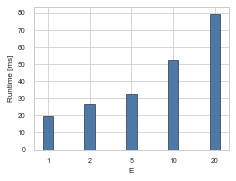

In [6]:
BAR_WIDTH = 0.25

runtime_lookup_v100 = pd.read_table("runtime_lookup_v100.txt")
df = runtime_lookup_v100[(runtime_lookup_v100["N"] == 100000) & (runtime_lookup_v100["L"] == 10000)]

# Create plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot bars
ax.bar(np.arange(len(df["E"])), df["kEDM lookup"], width=BAR_WIDTH, label="kEDM lookup", 
               color="C0", linewidth=0.5)

# Setup x and y axes
ax.set_xlabel("E")
ax.set_xticks(np.arange(len(df["E"])))
ax.set_xticklabels(df["E"])
ax.set_ylabel("Runtime [ms]")
    
plt.show(fig)
fig.savefig("../figs/runtime_lookup_v100.pdf", bbox_inches="tight", pad_inches=0)

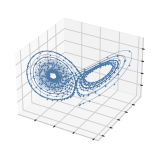

In [96]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def lorenz(xyz, t):
    x, y, z = xyz  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

fig = plt.figure()
ax = fig.gca(projection="3d")

xyz = odeint(lorenz, [1.0, 1.0, 1.0], np.arange(0.0, 30.0, 0.01))

ax.plot(xyz[::5, 0], xyz[::5, 1], xyz[::5, 2], linestyle="none", marker="o", ms=0.5, color="C0")
ax.plot(xyz[:, 0], xyz[:, 1], xyz[:, 2], linewidth=0.3, color="C0")

# ax.set_xlabel(r"$x(t)$", labelpad=-15)
# ax.set_ylabel(r"$y(t)$", labelpad=-15)
# ax.set_zlabel(r"$z(t)$", labelpad=-15)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()
fig.savefig("../figs/lorenz.pdf", bbox_inches="tight", pad_inches=0)

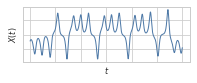

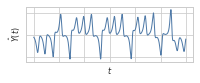

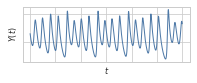

In [112]:
fig = plt.figure(figsize=(3, 1))
ax = fig.gca()
ax.plot(t[t.shape[0]//2:], xyz[t.shape[0]//2:, 0], linewidth=1)
ax.set_xlabel(r"$t$", labelpad=-5)
ax.set_ylabel(r"$X(t)$", labelpad=-5)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

plt.show()
fig.savefig("../figs/lorenz_x.pdf", bbox_inches="tight", pad_inches=0)

fig = plt.figure(figsize=(3, 1))
ax = fig.gca()
ax.plot(t[t.shape[0]//2:], xyz[t.shape[0]//2:, 1], linewidth=1)
ax.set_xlabel(r"$t$", labelpad=-5)
ax.set_ylabel(r"$\hat{Y}(t)$", labelpad=-5)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

plt.show()
fig.savefig("../figs/lorenz_y.pdf", bbox_inches="tight", pad_inches=0)

fig = plt.figure(figsize=(3, 1))
ax = fig.gca()
ax.plot(t[t.shape[0]//2:], xyz[t.shape[0]//2:, 2], linewidth=1)
ax.set_xlabel(r"$t$", labelpad=-5)
ax.set_ylabel(r"$Y(t)$", labelpad=-5)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

plt.show()
fig.savefig("../figs/lorenz_z.pdf", bbox_inches="tight", pad_inches=0)

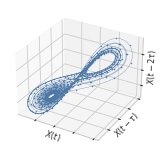

In [107]:
fig = plt.figure()
ax = fig.gca(projection="3d")

tau = 5
ax.plot(xyz[:-2*tau:5, 0], xyz[tau:-tau:5, 0], xyz[2*tau::5, 0], linestyle="none", marker="o", ms=0.5, color="C0")
ax.plot(xyz[:-2*tau, 0], xyz[tau:-tau, 0], xyz[2*tau:, 0], linewidth=0.3, color="C0")

ax.set_xlabel(r"$X(t)$", labelpad=-15)
ax.set_ylabel(r"$X(t-\tau)$", labelpad=-15)
ax.set_zlabel(r"$X(t-2\tau)$", labelpad=-15)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()
fig.savefig("../figs/lorenz_xembedding.pdf", bbox_inches="tight", pad_inches=0)

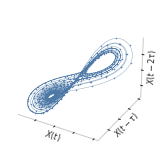

In [108]:
fig = plt.figure()
ax = fig.gca(projection="3d")

tau = 5
ax.plot(xyz[:-2*tau:5, 0], xyz[tau:-tau:5, 0], xyz[2*tau::5, 0], linestyle="none", marker="o", ms=0.5, color="C0")
ax.plot(xyz[:-2*tau, 0], xyz[tau:-tau, 0], xyz[2*tau:, 0], linewidth=0.3, color="C0")

ax.set_xlabel(r"$X(t)$", labelpad=-15)
ax.set_ylabel(r"$X(t-\tau)$", labelpad=-15)
ax.set_zlabel(r"$X(t-2\tau)$", labelpad=-15)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis._axinfo["grid"]["color"] = (1.0, 1.0, 1.0, 0.0)
ax.yaxis._axinfo["grid"]["color"] = (1.0, 1.0, 1.0, 0.0)
ax.zaxis._axinfo["grid"]["color"] = (1.0, 1.0, 1.0, 0.0)

plt.show()
fig.savefig("../figs/lorenz_xembedding_nogrid.pdf", bbox_inches="tight", pad_inches=0)

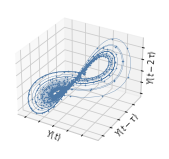

In [99]:
fig = plt.figure()
ax = fig.gca(projection="3d")

tau = 5
ax.plot(xyz[:-2*tau:5, 1], xyz[tau:-tau:5, 1], xyz[2*tau::5, 1], linestyle="none", marker="o", ms=0.5, color="C0")
ax.plot(xyz[:-2*tau, 1], xyz[tau:-tau, 1], xyz[2*tau:, 1], linewidth=0.3, color="C0")

ax.set_xlabel(r"$Y(t)$", labelpad=-15)
ax.set_ylabel(r"$Y(t-\tau)$", labelpad=-15)
ax.set_zlabel(r"$Y(t-2\tau)$", labelpad=-15)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()
fig.savefig("../figs/lorenz_yembedding.pdf", bbox_inches="tight", pad_inches=0)

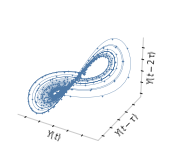

In [109]:
fig = plt.figure()
ax = fig.gca(projection="3d")

tau = 5
ax.plot(xyz[:-2*tau:5, 1], xyz[tau:-tau:5, 1], xyz[2*tau::5, 1], linestyle="none", marker="o", ms=0.5, color="C0")
ax.plot(xyz[:-2*tau, 1], xyz[tau:-tau, 1], xyz[2*tau:, 1], linewidth=0.3, color="C0")

ax.set_xlabel(r"$Y(t)$", labelpad=-15)
ax.set_ylabel(r"$Y(t-\tau)$", labelpad=-15)
ax.set_zlabel(r"$Y(t-2\tau)$", labelpad=-15)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis._axinfo["grid"]["color"] = (1.0, 1.0, 1.0, 0.0)
ax.yaxis._axinfo["grid"]["color"] = (1.0, 1.0, 1.0, 0.0)
ax.zaxis._axinfo["grid"]["color"] = (1.0, 1.0, 1.0, 0.0)

plt.show()
fig.savefig("../figs/lorenz_yembedding_nogrid.pdf", bbox_inches="tight", pad_inches=0)